In [1]:
import numpy as np
import matplotlib.pyplot as plt

class RBFN(object):

    def __init__(self, hidden_shape, sigma=1.0):
        """ radial basis function network
        # Arguments
            input_shape: dimension of the input data
            e.g. scalar functions have should have input_dimension = 1
            hidden_shape: the number
            hidden_shape: number of hidden radial basis functions,
            also, number of centers.
        """
        self.hidden_shape = hidden_shape
        self.sigma = sigma
        self.centers = None
        self.weights = None

    def _kernel_function(self, center, data_point):
        return np.exp(-self.sigma*np.linalg.norm(center-data_point)**2)

    def _calculate_interpolation_matrix(self, X):
        """ Calculates interpolation matrix using a kernel_function
        # Arguments
            X: Training data
        # Input shape
            (num_data_samples, input_shape)
        # Returns
            G: Interpolation matrix
        """
        G = np.zeros((len(X), self.hidden_shape))
        for data_point_arg, data_point in enumerate(X):
            for center_arg, center in enumerate(self.centers):
                G[data_point_arg, center_arg] = self._kernel_function(
                        center, data_point)
        return G

    def _select_centers(self, X):
        random_args = np.random.choice(len(X), self.hidden_shape)
        centers = X[random_args]
        return centers

    def fit(self, X, Y):
        """ Fits weights using linear regression
        # Arguments
            X: training samples
            Y: targets
        # Input shape
            X: (num_data_samples, input_shape)
            Y: (num_data_samples, input_shape)
        """
        self.centers = self._select_centers(X)
        G = self._calculate_interpolation_matrix(X)
        self.weights = np.dot(np.linalg.pinv(G), Y)

    def predict(self, X):
        """
        # Arguments
            X: test data
        # Input shape
            (num_test_samples, input_shape)
        """
        G = self._calculate_interpolation_matrix(X)
        predictions = np.dot(G, self.weights)
        return predictions

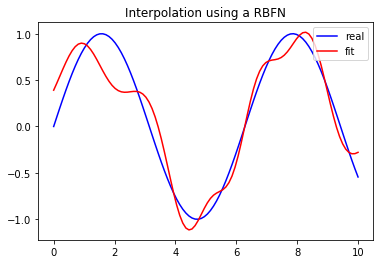

In [2]:
# generating data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# fitting RBF-Network with data
model = RBFN(hidden_shape=10, sigma=1.)
model.fit(x, y)
y_pred = model.predict(x)

# plotting 1D interpolation
plt.plot(x, y, 'b-', label='real')
plt.plot(x, y_pred, 'r-', label='fit')
plt.legend(loc='upper right')
plt.title('Interpolation using a RBFN')
plt.show()

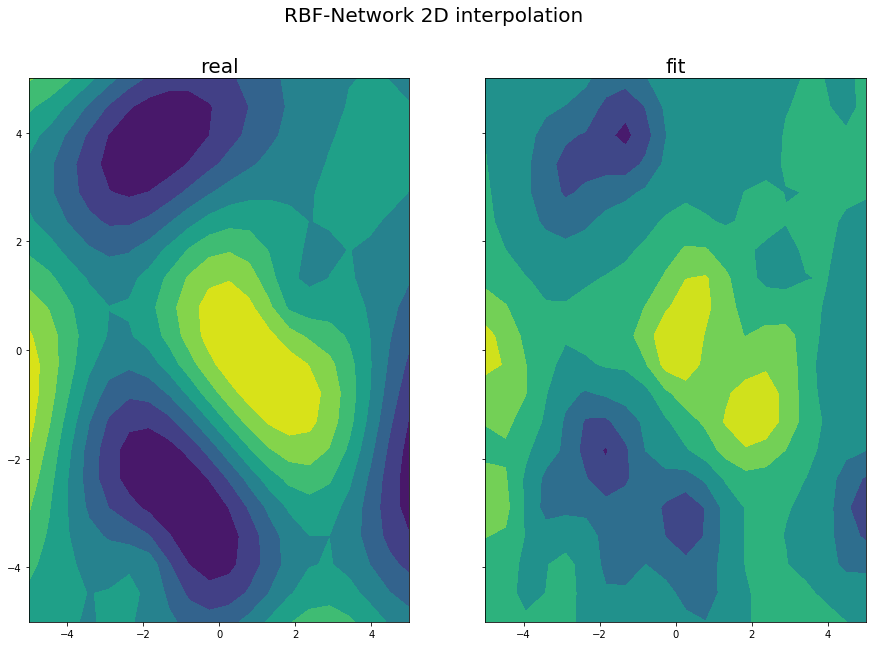

In [3]:
# generating dummy data for interpolation
x, y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-5, 5, 20))
z = (np.sin(np.sqrt((x - 2.)**2 + (y - 1)**2)) -
     np.sin(np.sqrt((x + 2.)**2 + (y + 4)**2))) / 2.

# fitting RBF-Network with data
features = np.asarray(list(zip(x.flatten(), y.flatten())))
model = RBFN(hidden_shape=70, sigma=1.)
model.fit(features, z.flatten())
predictions = model.predict(features)

# plotting 2D interpolation
figure, (axis_left, axis_right) = plt.subplots(1, 2, figsize=(15, 10), sharey=True)
figure.suptitle('RBF-Network 2D interpolation', fontsize=20)
axis_right.set_title('fit', fontsize=20)
axis_left.set_title('real', fontsize=20)
axis_left.contourf(x, y, z)
right_image = axis_right.contourf(x, y, predictions.reshape(20, 20))
plt.show()